In [1]:
# Import necessary libraries
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots
from matplotlib import rcParams

from sklearn.ensemble import IsolationForest  # For Isolation Forest algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation

# Set the figure size globally
rcParams['figure.figsize'] = (14, 8)

# Set a random seed for reproducibility
np.random.seed(42)

# Define labels for classification
CLASS_LABELS = ["Normal", "Fraud"]

data = pd.read_csv(r"C:\Users\khanu\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
LABELS = ["Normal" , "Fraud"] 

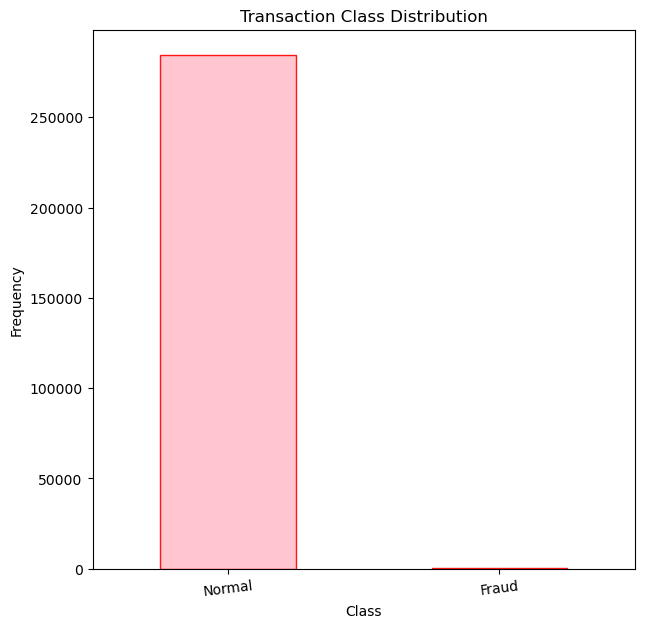

In [5]:
import matplotlib.pyplot as plt

# Calculate the number of values for each class
count_classes = pd.value_counts(data['Class'], sort=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(7, 7))
count_classes.plot(kind='bar', rot=7, edgecolor="red", color="pink", alpha=0.9, ax=ax)

# Set the title and labels of the plot
ax.set_title("Transaction Class Distribution")
ax.set_xticks(range(2))
ax.set_xticklabels(LABELS)
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")

# Display the plot
plt.show()

In [12]:
# value of 1 in the "Class" column indicates (fraud) transactions
fraud=data[data["Class"]==1]
# value of 0 in the "Class" column indicates (real) transactions
real=data[data["Class"]==0]

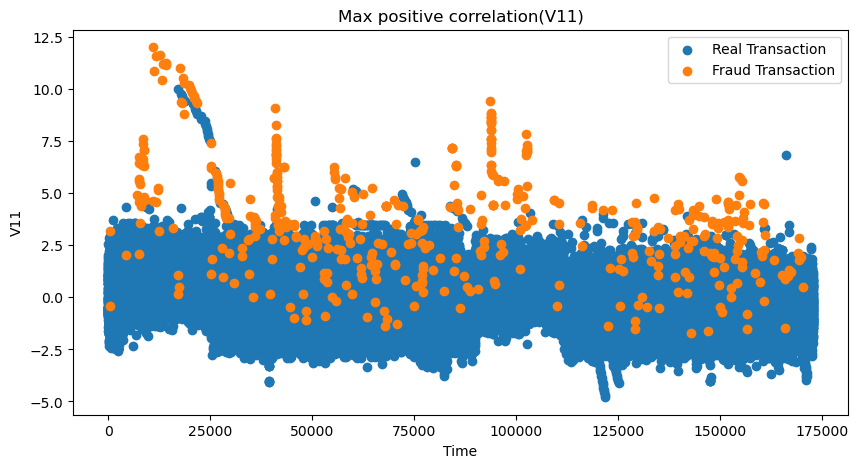

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(real["Time"],real["V11"],label="Real Transaction")
plt.scatter(fraud["Time"],fraud["V11"],label="Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("V11")
plt.title("Max positive correlation(V11)")
plt.legend()
plt.show()

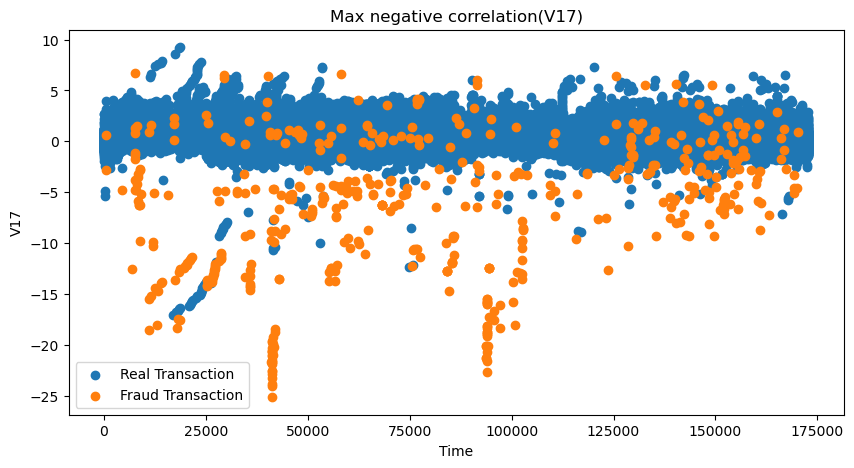

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(real["Time"],real["V17"],label="Real Transaction")
plt.scatter(fraud["Time"],fraud["V17"],label="Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("V17")
plt.title("Max negative correlation(V17)")
plt.legend()
plt.show()

In [9]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

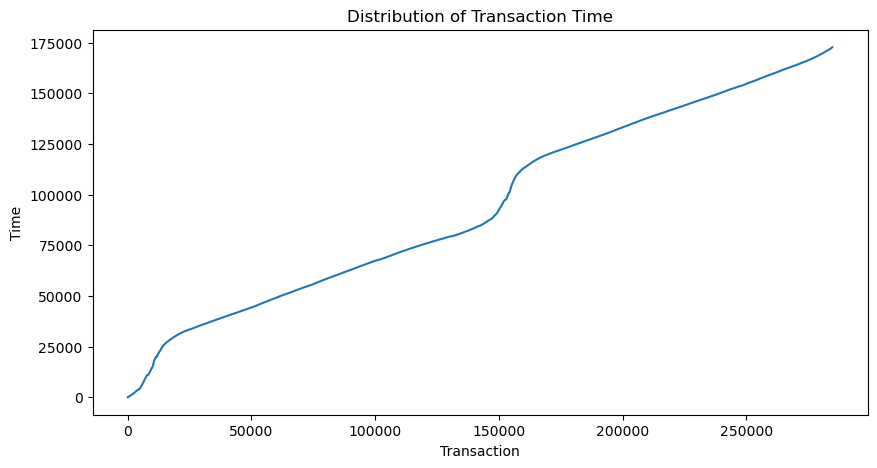

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data.index,data["Time"])
plt.xlabel("Transaction")
plt.ylabel("Time")
plt.title("Distribution of Transaction Time")
plt.show()

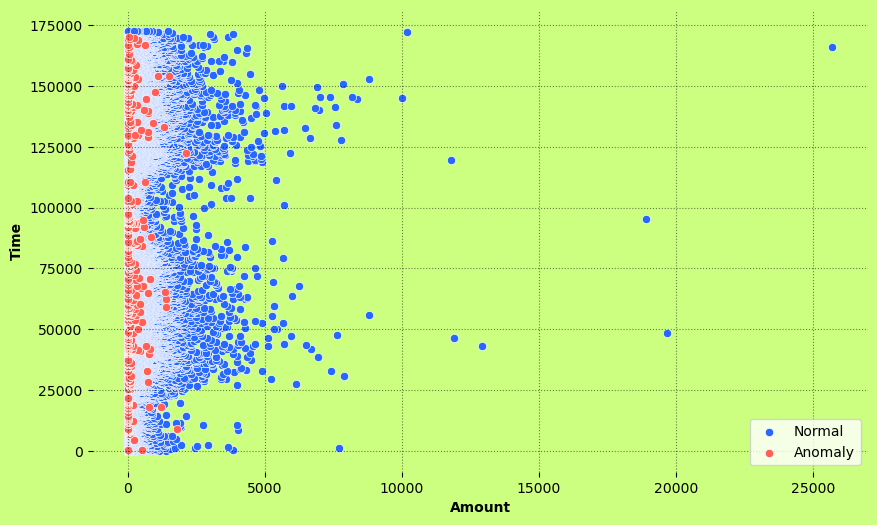

In [15]:
background_color = '#CCFF80'
color_palette=['#2769FE', '#FF5F57', '#4dad82', '#230F88', '#0E0330']
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

sns.scatterplot(data=real, x='Amount', y='Time', color=color_palette[0], label='Normal', ax=ax)
sns.scatterplot(data=fraud, x='Amount', y='Time', color=color_palette[1], label='Anomaly', ax=ax)

ax.set_xlabel('Amount', fontweight='bold')
ax.set_ylabel('Time', fontweight='bold')
ax.legend()

ax.tick_params(left=True, bottom=True)
ax.grid(True, color='#000000', linestyle=':', alpha=0.5)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.show()

C:\Users\khanu\AppData\Local\Temp\ipykernel_22908\3451598543.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(fraud[column], ax=ax, label='Fraud', fill=True, color=color_palette[0])
C:\Users\khanu\AppData\Local\Temp\ipykernel_22908\3451598543.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(real[column], ax=ax, label='Normal', fill=True, color=color_palette[1])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


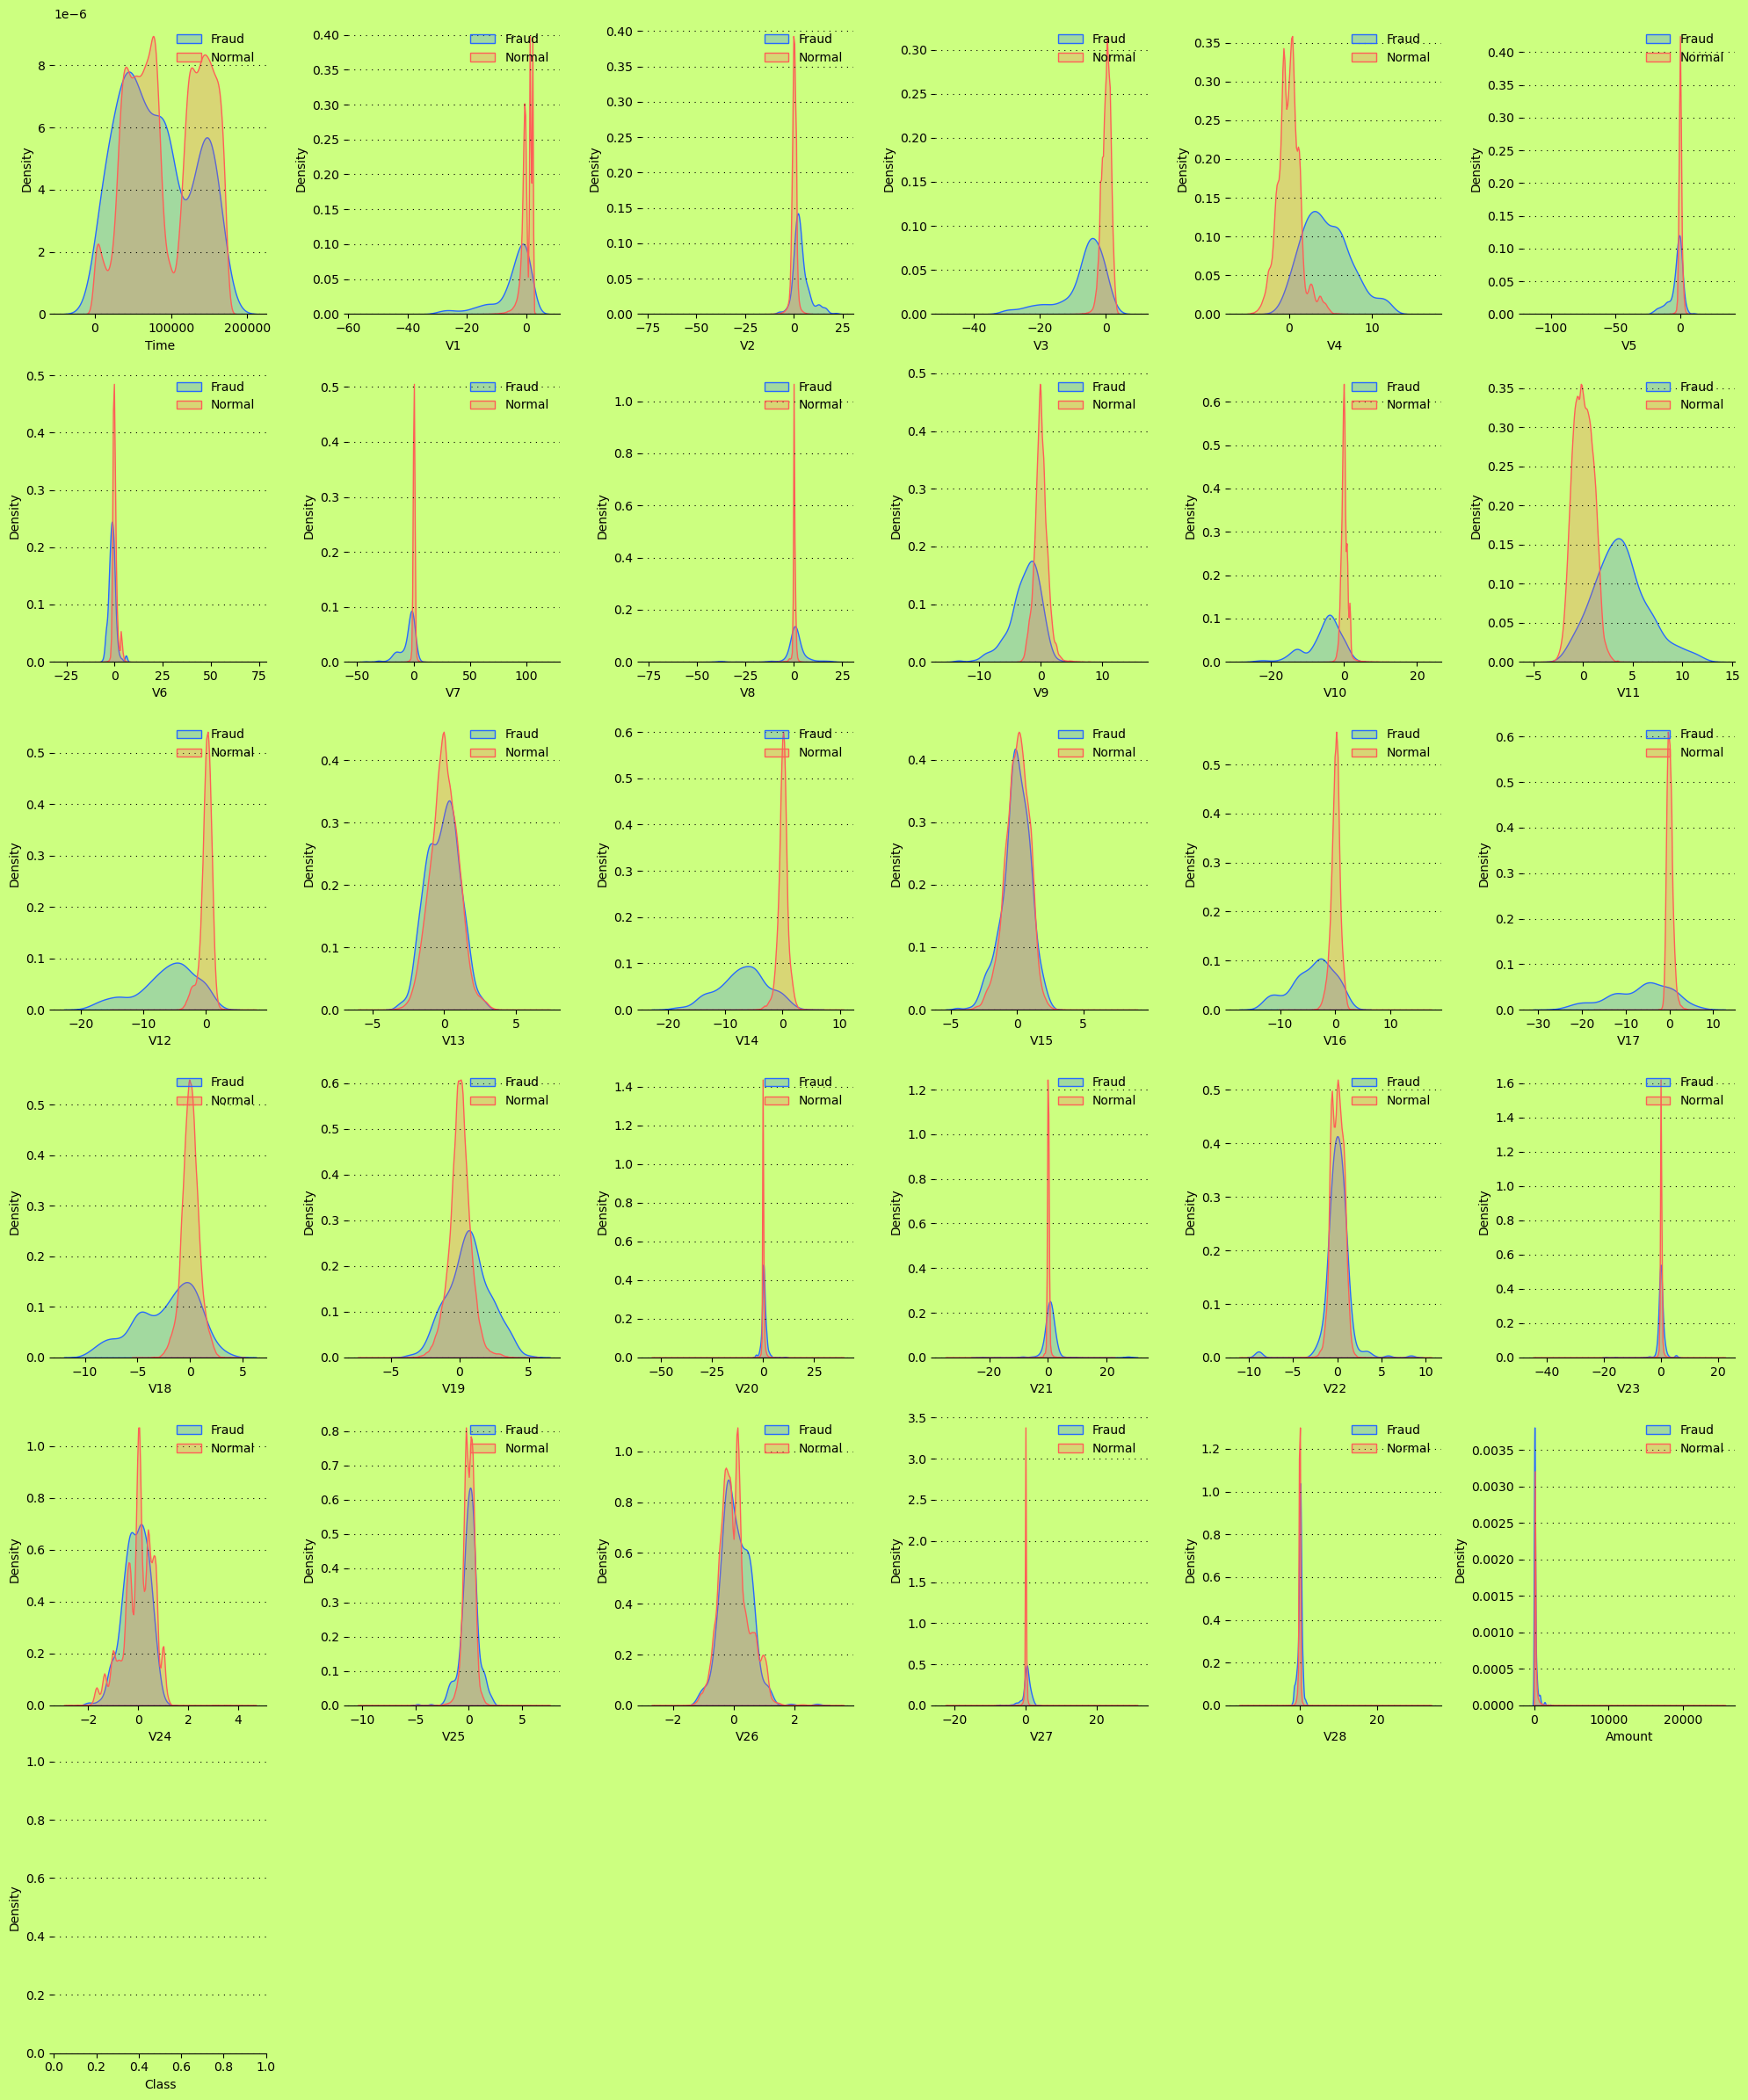

In [17]:
num_plots = len(fraud.columns)
num_cols = 6
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig = plt.figure(figsize=(20, num_rows * 4))
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(num_rows, num_cols)
axes = [fig.add_subplot(gs[i // num_cols, i % num_cols]) for i in range(num_plots)]

for ax, column in zip(axes, fraud.columns):
    sns.kdeplot(fraud[column], ax=ax, label='Fraud', fill=True, color=color_palette[0])
    sns.kdeplot(real[column], ax=ax, label='Normal', fill=True, color=color_palette[1])
    # ax.set_title(column, fontweight='bold', fontfamily='serif')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    ax.set_facecolor(background_color)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    ax.legend(loc='upper right', frameon=False)

if num_plots % num_cols != 0:
    for ax in axes[num_plots:]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


In [18]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Froud"]

In [21]:
data = pd.read_csv(r"C:\Users\khanu\creditcard.csv")

In [22]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =43)

In [24]:
froud = data[data['Class']==1]
normal = data[data['Class']==0]

In [25]:
outlier_proportion = len(froud)/float(len(normal))

In [26]:
cv = IsolationForest(n_estimators=100, max_samples=len(X_train), contamination=outlier_proportion,random_state=state, verbose=0)

In [27]:
cv.fit(X_train, Y_train)

IsolationForest(contamination=0.0017304750013189597, max_samples=227845,
                random_state=RandomState(MT19937) at 0x1DBD0CF7540)

In [28]:
scores_prediction = cv.decision_function(X_test)
y_predict = cv.predict(X_test)

In [29]:
y_predict[y_predict == 1] = 0
y_predict[y_predict == -1] = 1
m_errors = (y_predict != Y_test).sum()

In [30]:
print("Isolation Forrest", m_errors)

Isolation Forrest 137


In [31]:
print("Accuracy Score :", accuracy_score(Y_test,y_predict))

Accuracy Score : 0.9975948878199501


In [32]:
print("Classification Report :")
print(classification_report(Y_test,y_predict))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.36      0.39      0.37       106

    accuracy                           1.00     56962
   macro avg       0.68      0.69      0.69     56962
weighted avg       1.00      1.00      1.00     56962

